### 데이터 생성 및 확인

In [77]:
import torch

N = 100

radius1 = 0.3 + 0.05*torch.randn(int(N/2), 1)
radius2 = 1 + 0.01*torch.randn(int(N/2), 1)

theta1 = 2*torch.pi*torch.rand(int(N/2), 1) - torch.pi
theta2 = 2*torch.pi*torch.rand(int(N/2), 1) - torch.pi

class1_data = torch.hstack([radius1*torch.cos(theta1), radius1*torch.sin(theta1)])
class2_data = torch.hstack([radius2*torch.cos(theta2), radius2*torch.sin(theta2)])

class1_label = torch.ones(int(N/2), 1)
class2_label = torch.zeros(int(N/2), 1)

X = torch.vstack([class1_data, class2_data])
y = torch.vstack([class1_label, class2_label])

print(X.shape, y.shape)
print(class1_label.shape, class2_label.shape)

torch.Size([100, 2]) torch.Size([100, 1])
torch.Size([50, 1]) torch.Size([50, 1])


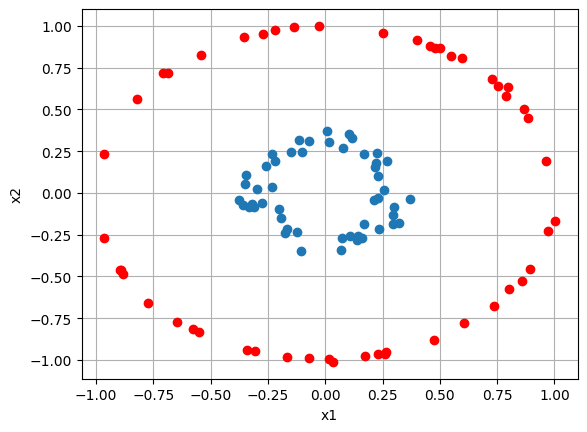

In [78]:
import matplotlib.pyplot as plt

plt.plot(class1_data[:,0], class1_data[:,1], 'o')
plt.plot(class2_data[:,0], class2_data[:,1], 'ro')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

### 모델 생성

In [74]:
import torch
from torch import nn

class BinaryClassification(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1 = nn.Sequential(
            nn.Linear(2, 100),
            nn.ReLU()
        )

        self.layer2 = nn.Sequential(
            nn.Linear(100, 100),
            nn.ReLU()
        )

        self.layer3 = nn.Sequential(
            nn.Linear(100, 100),
            nn.ReLU()
        )

        self.layer4 = nn.Sequential(
            nn.Linear(100, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        return x

### 모델 training

In [65]:
from torch import optim

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = BinaryClassification().to(device)
criterion = nn.BCELoss().to(device)
optimizer = optim.Adam(params=model.parameters(), lr=0.00001)

loss_history = []

for epoch in range(10000):
    X = X.to(device)
    y = y.to(device)

    output = model(X)
    loss = criterion(output, y)
    loss_history.append(loss.cpu().detach())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 1000 == 0:
        print(f'Epoch:{epoch+1} Loss:{loss}')

Epoch:1000 Loss:0.5684905052185059
Epoch:2000 Loss:0.3008470833301544
Epoch:3000 Loss:0.11513728648424149
Epoch:4000 Loss:0.043423209339380264
Epoch:5000 Loss:0.017764193937182426
Epoch:6000 Loss:0.007992574013769627
Epoch:7000 Loss:0.0038476651534438133
Epoch:8000 Loss:0.0019366785418242216
Epoch:9000 Loss:0.001004901947453618
Epoch:10000 Loss:0.0005335565656423569


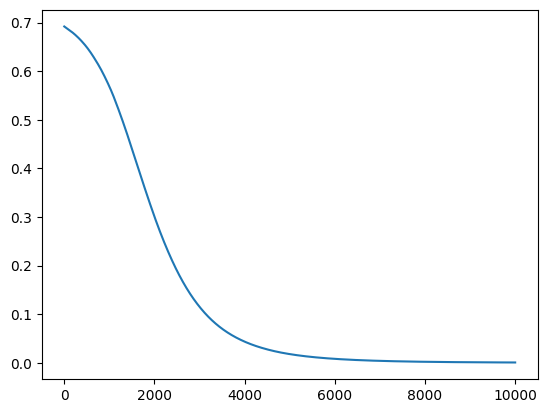

In [66]:
plt.plot(loss_history)

### 모델 test

In [70]:
with torch.no_grad():
    model.eval() # batch-norm, dropout은 test, inference에서 다르게 동작함

    output = model(X)
    
    for i in range(len(output)):
        result = output[i]
        label = y[i]
        
        print(f'{i+1} : ', end='')
        if result > 0.5:
            if label == 1:
                print('Correct')
            else:
                print('Wrong')
        else:
            if label == 0:
                print('Correct')
            else:
                print('Wrong')

1 : Correct
2 : Correct
3 : Correct
4 : Correct
5 : Correct
6 : Correct
7 : Correct
8 : Correct
9 : Correct
10 : Correct
11 : Correct
12 : Correct
13 : Correct
14 : Correct
15 : Correct
16 : Correct
17 : Correct
18 : Correct
19 : Correct
20 : Correct
21 : Correct
22 : Correct
23 : Correct
24 : Correct
25 : Correct
26 : Correct
27 : Correct
28 : Correct
29 : Correct
30 : Correct
31 : Correct
32 : Correct
33 : Correct
34 : Correct
35 : Correct
36 : Correct
37 : Correct
38 : Correct
39 : Correct
40 : Correct
41 : Correct
42 : Correct
43 : Correct
44 : Correct
45 : Correct
46 : Correct
47 : Correct
48 : Correct
49 : Correct
50 : Correct
51 : Correct
52 : Correct
53 : Correct
54 : Correct
55 : Correct
56 : Correct
57 : Correct
58 : Correct
59 : Correct
60 : Correct
61 : Correct
62 : Correct
63 : Correct
64 : Correct
65 : Correct
66 : Correct
67 : Correct
68 : Correct
69 : Correct
70 : Correct
71 : Correct
72 : Correct
73 : Correct
74 : Correct
75 : Correct
76 : Correct
77 : Correct
78 : Cor